<div align="center">
    <h1>MDSAA TEXT MINING 2020-2021</h1>
    <h2>MACHINE TRANSLATION METRICS</h2>
    <p style="text-align:center">David Sotto-Mayor Machado (m20201023@novaims.unl.pt), Maikel Sousa (m20200735@novaims.unl.pt), Catarina Moreira (m20201034@novaims.unl.pt)</p>
</div>

<h2>Import Libraries</h2>

In [1]:
import os, sys, re, time, gzip, zlib, logging, transformers, urllib.request, shutil
import pandas as pd
import numpy as np
from comet.models import download_model
import jieba.posseg as pseg
import comet
from collections import Counter
from rouge import Rouge
from tqdm.notebook import tqdm
from bert_score import score
from nltk.translate.bleu_score import sentence_bleu
from nltk.corpus import stopwords
from nltk import download
from stopwordsiso import stopwords as swordsiso
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from matplotlib import rcParams
from bert_score import score
from tqdm import tqdm_notebook as tqdm
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import string
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display_html 
import matplotlib.pyplot as plt
import scipy.stats as stats
from zipfile import *
import platform
from bleurt import score
import bleurt
import jieba
import bert

comet_ml is installed but `COMET_API_KEY` is not set.
/Users/catarinamoreira/opt/anaconda3/envs/tm/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

<h2>Functions</h2>

In [3]:
#Function to return the number of annotators in the Pandas dataframe
def label_counter(dataframe, field):
    """
    Function that receives a dataframe and the field whose labels you want to count and
    returns the number of annotators in the Pandas dataframe.
    """    
    return dataframe[field].value_counts()

In [4]:
#Function to return the number of annotators in the Pandas dataframe
def label_mean(dataframe, field):
    """
    Function that receives a dataframe and the field whose labels you want to do the mena and
    returns the mean
    """ 
    return dataframe[field].mean()

In [5]:
#Function to return the frequenccy of each word of EN source
def word_counter(text_list):
    """
    Function that receives a list of strings and returns the frequency of each word
    in the set of all strings.
    """
    words_in_df = ' '.join(text_list).split()
    
    # Count all words 
    freq = pd.Series(words_in_df).value_counts()
    return freq

In [6]:
#Function to return the frequenccy of each word of ZH sources
def word_counter1(text_list):
    """
    Function that receives a list of strings and returns the frequency of each word
    in the set of all strings.
    """
    words_in_df = '，'.join(list(corpora[1]['source'])).split('，')
    
    # Count all words 
    freq = pd.Series(words_in_df).value_counts()
    return freq

In [7]:
def clean(text_list, stop, lemmatize, stemmer):
    """
    Function that a receives a list of strings and preprocesses it.
    
    :param text_list: List of strings.
    :param lemmatize: Tag to apply lemmatization if True.
    :param stemmer: Tag to apply the stemmer if True.
    """
    updates = []
    for j in tqdm(range(len(text_list))): #create the bars
        
        text = text_list[j]
        
        #LOWERCASE TEXT
        text = text.lower()
        
        #REMOVE TAGS
        text = " ".join([BeautifulSoup(word).get_text() for word in text.split()])
        
        #REMOVE NUMERICAL DATA AND PUNCTUATION
        text = re.sub("[^a-zA-Z]", ' ', text)
        
        #REMOVE STOP WORDS
        text = " ".join([word for word in text.split() if word not in stop])
        
        
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        if stemmer:
            text = " ".join(snowball_stemmer.stem(word) for word in text.split())
        
        updates.append(text)
        
    return updates

def update_df(dataframe, list_updated,column1):
    dataframe.update(pd.DataFrame({column1: list_updated}))

In [8]:
def clean_finlandes(text_list,stop, lemmatize, stemmer):
    """
    Function that a receives a list of strings and preprocesses it.
    
    :param text_list: List of strings.
    :param lemmatize: Tag to apply lemmatization if True.
    :param stemmer: Tag to apply the stemmer if True.
    """
    updates = []
    for j in tqdm(range(len(text_list))): #create the bars
        
        text = text_list[j]
        
        #LOWERCASE TEXT
        text = text.upper()
        
        #REMOVE NUMERICAL DATA AND PUNCTUATION
        text = re.sub("[^a-zA-ZǺÄÖ]", ' ', text)
        
        #REMOVE TAGS
        text = BeautifulSoup(text).get_text()
        
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        if stemmer:
            text = " ".join(snowball_stemmer.stem(word) for word in text.split())
        
        updates.append(text)
        
    return updates

def update_df(dataframe, list_updated,column1):
    dataframe.update(pd.DataFrame({column1: list_updated}))

In [9]:
def clean_chinese(text_list, stop):
    """
    Function that a receives a list of strings and preprocesses it.
    
    :param text_list: List of strings.
    :param lemmatize: Tag to apply lemmatization if True.
    :param stemmer: Tag to apply the stemmer if True.
    """
    updates = []
    for j in tqdm(range(len(text_list))): #create the bars
        
        text = text_list[j]
        
        #REMOVE NUMERICAL DATA AND PUNCTUATION
        text =  re.sub("[0-9]", ' ', text)
        
        text = re.sub("r[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。. ？、~@#￥%……&*（）：；《）《》“”()»〔〕-]+", " ", text.encode().decode("utf8"))
        
        #REMOVE TAGS
        text = BeautifulSoup(text).get_text()
        
        updates.append(text)
        
    return updates

def update_df(dataframe, list_updated,column1):
    dataframe.update(pd.DataFrame({column1: list_updated}))

In [10]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [11]:
def plot_frequencies(top_df, top_df1):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    
    fig = plt.figure()
    plt.figure(figsize=(20,5))
    
    plt.subplot(1, 2, 1)
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    
    
    plt.subplot(1, 2, 2)
    x_labels = top_df1["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df1["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

<h2>Import Corpora</h2>

In [12]:
#To import all the corpus csv files
folder='corpus'
corpus = os.listdir(folder)
corpus.remove('.DS_Store')

filename = 'scores.csv'
corpora=[]

for sub in corpus:
    corpora.append(pd.read_csv('{}/{}/{}'.format(folder,sub,filename)))
        
print('\033[1m',len(corpora),'\033[0mcorpora imported.')

 6 corpora imported.


In [13]:
#To drop rows with missing translations or references
for i in range(len(corpus)):
    corpora[i].drop(corpora[i][corpora[i]["reference"] == "."].index, inplace=True)
    corpora[i].drop(corpora[i][corpora[i]["translation"] == "."].index, inplace=True)
    corpora[i].reset_index(drop=True, inplace=True)

In [14]:
#To list the different translation language pairs
corpus

['en-fi', 'zh-en', 'cs-en', 'en-zh', 'de-en', 'ru-en']

In [ ]:
csen, deen, enfi, enzh, ruen, zhen

In [15]:
#To verify one of the corpus
corpora[0].head(5)

,source,reference,translation,z-score,avg-score,annotators
0,"You can turn yourself into a pineapple, a dog ...","Voit muuttaa itsesi ananasta, koirasta tai Roy...","Voit muuttaa itsesi ananakseksi, koiraksi tai ...",-0.286195,34.20,5
1,Also shot were three men: two 29-year-olds and...,Myös ammuttiin kolme miestä: kaksi 29-vuotiait...,Myös kolmea miestä ammuttiin: kahta 29-vuotias...,0.547076,58.40,5
2,The information is stored at the cash register...,Tiedot tallennetaan kassakoneisiin joka tapauk...,Tiedot kuitenkin tallentuvat kassoilla joka ta...,1.122476,74.60,5
3,Xinhua says that there were traces of hydrochl...,"Xinhua kertoo, että Xinyin näytteestä oli sunn...","Xinhua kertoo, että Xinyin sunnuntaina antamas...",0.383095,53.60,5
4,"MacDonald, who was brought on board CBC's comm...",Voitaisiin kuulla CBD: n kommenttitiimin toimi...,"MacDonaldin, joka tuli CBC:n selostajatiimiin ...",-0.493065,32.25,4


<h2>Pre-processing Data</h2>

As we know, one importante step before starting our experiments is to divide the corpora in training and test sets. However, this corpora is already divided and the corpora that is given to us is the training set. 

### Corpus inspection


Here, we are going to look into our data, understand it and think how to solve the problem.

###### Check the training set of each corpora

In [16]:
#To check the training set of the first corpora
corpora[0][:5]

,source,reference,translation,z-score,avg-score,annotators
0,"You can turn yourself into a pineapple, a dog ...","Voit muuttaa itsesi ananasta, koirasta tai Roy...","Voit muuttaa itsesi ananakseksi, koiraksi tai ...",-0.286195,34.20,5
1,Also shot were three men: two 29-year-olds and...,Myös ammuttiin kolme miestä: kaksi 29-vuotiait...,Myös kolmea miestä ammuttiin: kahta 29-vuotias...,0.547076,58.40,5
2,The information is stored at the cash register...,Tiedot tallennetaan kassakoneisiin joka tapauk...,Tiedot kuitenkin tallentuvat kassoilla joka ta...,1.122476,74.60,5
3,Xinhua says that there were traces of hydrochl...,"Xinhua kertoo, että Xinyin näytteestä oli sunn...","Xinhua kertoo, että Xinyin sunnuntaina antamas...",0.383095,53.60,5
4,"MacDonald, who was brought on board CBC's comm...",Voitaisiin kuulla CBD: n kommenttitiimin toimi...,"MacDonaldin, joka tuli CBC:n selostajatiimiin ...",-0.493065,32.25,4


In [17]:
#To check the training set of the second corpora
corpora[1][:5]

,source,reference,translation,z-score,avg-score,annotators
0,他性格活泼，这对英国赛马来说是好事，但是除此之外，他还是一位不可思议的骑师。,"His character is good for the British horse, b...",He's a lively character which is good for Brit...,0.625559,92.75,4
1,近日刚搬至旧金山的一位28岁厨师本周被发现死于当地一家商场的楼梯间。,"A 28 chef, who has just moved to San Francisco...",A 28-year-old chef who had recently moved to S...,0.550952,92.00,4
2,去年，有官员表示，胡克先生的团队所得出的结论是针对伊斯兰国炼油厂的空袭并未大幅削减恐怖组织的...,"Last year, officials said Mr. Hooker's team ha...","Last year, officials said, Mr. Hooker's team c...",0.540814,89.00,5
3,尤其值得玩味的是政府对于饥饿民众们的回应，比如总统市民赫伯特·胡佛“别人的事我可管不了”的态度。,It is particularly interesting to note the gov...,Especially savory are the accounts of the gove...,-0.793944,49.50,4
4,不过，从20世纪90年代至今，人类共进行了18次火星探测，而月球探测只进行了14次。,"However, from the 1990s to the present, human ...","However, ever since the 1990s, a total of 18 h...",0.046532,77.50,4


In [18]:
#To check the training set of the third corpora
corpora[2][:5]

,source,reference,translation,z-score,avg-score,annotators
0,Uchopíte pak zbraň mezi své předloktí a rameno...,You will then grab the weapon between your for...,You then grasp the gun between your forearm an...,-0.675383,60.000000,3
1,"Ale je-li New York změna, pak je to také znovu...","But if New York is changed, then it's also a r...","But if New York is change, it is also reinvent...",-0.829403,44.000000,2
2,"Dlouho a intenzivně jsem během léta přemýšlel,...",I have been thinking over and over again over ...,I have thought long and hard over the course o...,0.803185,96.500000,2
3,"Najdou si jiný způsob, jak někde podvádět.",They find another way to cheat somewhere.,They will find another way how to defraud others.,0.563149,90.500000,2
4,Zpráva o výměně v čele prezidentovy administra...,The report on the replacement of the president...,The news of the replacement at the top of the ...,0.021549,74.666667,3


In [19]:
#To check the training set of the fourth corpora
corpora[3][:5]

,source,reference,translation,z-score,avg-score,annotators
0,"""In the GISS model's simulation, Venus' slow s...",GSIS的科学家AnthonyDelGenio在新闻稿中解释说：“在GISS模型的模拟模型中...,戈达德太空研究所科学家安东尼·德尔·杰尼奥在新闻发布会上解释说：“在戈达德太空研究所的模型模...,-1.171867,50.0,1
1,Ai Yanhan of China in the Women's 4 x 200m Fre...,中国在英国女性4x200mFreestreyWTE中的最后被称为：“中国14岁的孩子从球下降...,参加女子4x200米自由泳接力赛决赛的中国小将艾衍含被这样描述：“那名14岁的中国小姑娘犯了...,-2.255403,26.5,2
2,"Then came 2012, when nothing much went right f...",然后来到2012年，当她和她的队友们没有什么好处。,2012年，她和她的队友都不被看好。,-2.508996,21.0,1
3,"Since last year, Guodian Group has exported a ...",自去年以来，GoudianGroup从南非通过南非港口出口了163套风力发电项目。,自去年以来，国电集团共计有163套风电项目陆续从连云港港出口南非。,-2.416780,23.0,1
4,"Some alleged that the Kempinski hotel simply ""...","一些人指称，Kempinski旅馆只是""被捕""，以满足阿拉伯客户的要求。",有人认为凯宾斯基酒店简直是为了满足阿拉伯客户的要求而“卑躬屈膝”。,-1.489676,45.0,7


In [20]:
#To check the training set of the fifth corpora
corpora[4][:5]

,source,reference,translation,z-score,avg-score,annotators
0,"Ihr Zeitlupentempo maßen sie, als sie vor Spit...",Her timeless pace measures them when they equi...,Their slow speed was measured by researchers o...,-0.345024,76.0,1
1,"Er sagte, dass die Bereiche ruhige Treffpunkte...",He said the areas offer quiet meeting points b...,He said the spaces provided calm meeting point...,0.903800,97.5,2
2,Für die Geschäftsleute an der B 27 ist es nur ...,"For businessmen at the B 27, it's only a small...",This is only a small consolation for businesse...,0.700503,94.0,1
3,Diese Fähigkeit sei möglicherweise angeboren o...,This ability may be born or developed with gen...,"This ability may be innate, or may develop as ...",-1.256572,51.5,2
4,Weil sie Wassertemperaturen um die sechs Grad ...,Because they prefer water temperatures around ...,They generally only come to the surface in win...,0.293909,87.0,2


In [21]:
#To check the training set of the sixth corpora
corpora[5][:5]

,source,reference,translation,z-score,avg-score,annotators
0,В этом году крымчане получат уведомление на оп...,This year the Crimeans will receive a notice f...,"This year, residents of Crimea will receive a ...",0.878043,92.0,1
1,Энергетические компании находятся под давление...,Energy companies are under pressure due to low...,Energy companies are under pressure from lower...,0.511473,81.5,2
2,В бархатный сезон покупают туры в основном оди...,"In the velvet season, tours are mostly single ...","In the autumn season, tours are mainly purchas...",0.947866,94.0,1
3,Возле него на всякий случай стоит познавательн...,"Near him, just in case, there is a cognitive t...","Beside it, for good measure, there is an infor...",1.052601,97.0,1
4,Действительно ли Эфиопия находится на грани ра...,Is Ethiopia on the verge of schism?,Is Ethiopia about to crack?,0.738397,88.0,1


###### Number of annotators each corpora

In [22]:
#To use the function label_counter on corpora[0]
label_counter(corpora[0], "annotators")

1    5768
2     690
3     120
4      80
5      79
6      11
Name: annotators, dtype: int64

In [23]:
#To use the function label_counter on corpora[1]
label_counter(corpora[1], "annotators")

1    17734
2     7126
3      895
4      572
5       45
6       33
8       10
7        2
9        1
Name: annotators, dtype: int64

In [24]:
#To use the function label_counter on corpora[2]
label_counter(corpora[2], "annotators")

2    5648
1    3854
3    1768
4     197
5      92
6      16
7       8
8       2
Name: annotators, dtype: int64

In [25]:
#To use the function label_counter on corpora[3]
label_counter(corpora[3], "annotators")

1     7266
2     2040
3      337
6      131
4      113
5      106
7      102
12      48
8       40
9       15
13      12
16       8
17       2
10       1
Name: annotators, dtype: int64

In [26]:
#To use the function label_counter on corpora[4]
label_counter(corpora[4], "annotators")

1    13599
2     6443
4      777
3      766
6       61
5       32
8       18
7        6
9        2
Name: annotators, dtype: int64

In [27]:
#To use the function label_counter on corpora[5]
label_counter(corpora[5], "annotators")

1    13309
2     4246
4      307
3      110
5        4
6        1
Name: annotators, dtype: int64

###### Evaluation mean of avg-score in each corpora

In [28]:
#To use the function label_mean on corpora[0]
round(label_mean(corpora[0], "avg-score"),3)

45.121

In [29]:
#To use the function label_mean on corpora[0]
round(label_mean(corpora[1], "avg-score"),3)

66.058

In [30]:
#To use the function label_mean on corpora[0]
round(label_mean(corpora[2], "avg-score"),3)

69.24

In [31]:
#To use the function label_mean on corpora[0]
round(label_mean(corpora[3], "avg-score"),3)

65.979

In [32]:
#To use the function label_mean on corpora[0]
round(label_mean(corpora[4], "avg-score"),3)

71.853

In [33]:
#To use the function label_mean on corpora[0]
round(label_mean(corpora[5], "avg-score"),3)

74.513

###### Frequency of each word

In [34]:
#To use the funciton word_counter on corpora[0]
word_counter(list(corpora[0]['reference']))[:10]

ja      2751
on      2530
että    1218
oli      926
ei       618
joka     595
-        512
hän      504
ovat     463
se       390
dtype: int64

In [35]:
word_counter(list(corpora[0]['translation']))[:10]

ja      2506
on      1951
että    1343
oli      703
ei       665
ovat     417
hän      403
joka     376
kun      356
kuin     305
dtype: int64

In [36]:
#To use the funciton word_counter on corpora[1]
word_counter1(list(corpora[1]['reference']))[:10]

目前     133
因此     112
据了解    108
去年      94
然而      90
据悉      80
同时      79
此前      73
周四      69
其中      67
dtype: int64

In [37]:
word_counter(list(corpora[1]['translation']))[:10]

the     44398
of      21892
and     18043
to      16658
in      11697
a       11067
is       6729
for      5771
that     5591
on       4676
dtype: int64

In [38]:
#To use the funciton word_counter on corpora[2]
word_counter(list(corpora[2]['reference']))[:10]

the     14652
of       6669
to       5461
and      5287
in       4813
a        4399
that     2312
is       2203
for      2066
The      1864
dtype: int64

In [39]:
word_counter(list(corpora[2]['translation']))[:10]

the     12525
to       6211
of       5540
and      5057
a        4777
in       4265
is       2507
that     2002
for      1896
was      1746
dtype: int64

In [40]:
#To use the funciton word_counter on corpora[3]
word_counter(list(corpora[3]['reference']))[:10]

，    1434
1     154
-     123
0     121
。     114
2      96
”      62
：      62
月      48
在      46
dtype: int64

In [41]:
word_counter(list(corpora[3]['translation']))[:10]

CBC        45
Galicia    33
Louis      33
Hamlets    28
Tower      28
Frank      27
Skeldon    22
NICE       19
BMA        18
Primark    18
dtype: int64

In [42]:
#To use the funciton word_counter on corpora[4]
word_counter(list(corpora[4]['reference']))[:10]

the     31180
of      13073
to      10423
in       9705
and      9636
a        9046
is       4653
that     4190
for      4072
The      3786
dtype: int64

In [43]:
word_counter(list(corpora[4]['translation']))[:10]

the     25111
to      11477
of      10744
and      9859
a        9529
in       8820
is       4523
for      4417
that     4168
on       3882
dtype: int64

In [44]:
#To use the funciton word_counter on corpora[5]
word_counter(list(corpora[5]['reference']))[:10]

the     32079
of      17896
to       9728
in       9390
and      8207
a        6462
that     4211
is       4032
on       3645
for      3357
dtype: int64

In [45]:
word_counter(list(corpora[5]['translation']))[:10]

the     25214
of      13691
to       9446
and      8560
in       8556
a        8232
is       3987
that     3873
for      3568
on       3172
dtype: int64

As we can notice, in each corpora the majority of the words in the top 10, most words are stopwords. 
These words will contain no semantic meaning and it will not help us. 

###### Initial Preprocessing

In [46]:
english_stopwords = set(stopwords.words('english'))
finnish_stopwords= set(stopwords.words('finnish'))
chinese_stopwords= set(swordsiso('zh'))

exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [47]:
#To update the reference and translation in corpora 0
updates_0_reference = clean_finlandes(corpora[0]["reference"],finnish_stopwords, lemmatize = True, stemmer = False)
updates_0_translation = clean_finlandes(corpora[0]["translation"], finnish_stopwords, lemmatize = True, stemmer = False)

  0%|          | 0/6748 [00:00<?, ?it/s]

  0%|          | 0/6748 [00:00<?, ?it/s]

In [48]:
#To update the dataframe
update_df(corpora[0], updates_0_reference, 'reference')
update_df(corpora[0], updates_0_translation, 'translation')

In [49]:
#To update the reference and translation in corpora 1
updates_1_reference = clean(corpora[1]["reference"],english_stopwords,  lemmatize = True, stemmer = False)
updates_1_translation = clean(corpora[1]["translation"], english_stopwords, lemmatize = True, stemmer = False)

  0%|          | 0/26418 [00:00<?, ?it/s]

  0%|          | 0/26418 [00:00<?, ?it/s]

In [50]:
#To update the dataframe
update_df(corpora[1], updates_1_reference, 'reference')
update_df(corpora[1], updates_1_translation, 'translation')

In [51]:
#To update the reference and translation in corpora 2
updates_2_reference = clean(corpora[2]["reference"], english_stopwords, lemmatize = True, stemmer = False)
updates_2_translation = clean(corpora[2]["translation"],english_stopwords,  lemmatize = True, stemmer = False)

  0%|          | 0/11585 [00:00<?, ?it/s]

  0%|          | 0/11585 [00:00<?, ?it/s]

In [52]:
#To update the dataframe
update_df(corpora[2], updates_2_reference, 'reference')
update_df(corpora[2], updates_2_translation, 'translation')

In [53]:
#To update the reference and translation in corpora 3
updates_3_reference= clean_chinese(corpora[3]["reference"],chinese_stopwords)
updates_3_translation = clean_chinese(corpora[3]["translation"],chinese_stopwords)

  0%|          | 0/10221 [00:00<?, ?it/s]

  0%|          | 0/10221 [00:00<?, ?it/s]

In [54]:
#To update the dataframe
update_df(corpora[3], updates_3_reference, 'reference')
update_df(corpora[3], updates_3_translation, 'translation')

In [55]:
#To update the reference and translation in corpora 4
updates_4_reference = clean(corpora[4]["reference"], english_stopwords, lemmatize = True, stemmer = False)
updates_4_translation = clean(corpora[4]["translation"],english_stopwords, lemmatize = True, stemmer = False)

  0%|          | 0/21704 [00:00<?, ?it/s]

  0%|          | 0/21704 [00:00<?, ?it/s]

In [56]:
#To update the dataframe
update_df(corpora[4], updates_4_reference,  'reference')
update_df(corpora[4], updates_4_translation, 'translation')

In [57]:
#To update the reference and translation in corpora 5
updates_5_reference = clean(corpora[5]["reference"],english_stopwords, lemmatize = True, stemmer = False)
updates_5_translation = clean(corpora[5]["translation"],english_stopwords, lemmatize = True, stemmer = False)

  0%|          | 0/17977 [00:00<?, ?it/s]

  0%|          | 0/17977 [00:00<?, ?it/s]

In [58]:
#To update the dataframe
update_df(corpora[5], updates_5_reference, 'reference')
update_df(corpora[5], updates_5_translation, 'translation')

### Bag-of-Words

In [59]:
cv_english = CountVectorizer(
    max_df=0.8,
    stop_words="english", 
    max_features=10000, 
    ngram_range=(1,3)
)

In [60]:
cv_finnish = CountVectorizer(
    max_df=0.8,
    stop_words=finnish_stopwords, 
    max_features=10000, 
    ngram_range=(1,3)
)

In [61]:
cv_chinese = CountVectorizer(
    max_df=0.8,
    stop_words=chinese_stopwords,
    max_features=10000, 
    ngram_range=(1,3)
)

In [62]:
top_df_0_reference = get_top_n_grams(corpora[0]['reference'], top_k=20, n=1)
top_df_0_translation = get_top_n_grams(corpora[0]['translation'], top_k=20, n=1)

In [63]:
df1_styler = top_df_0_reference.style.set_table_attributes("style='display:inline'").set_caption('Reference table')
df2_styler = top_df_0_translation.style.set_table_attributes("style='display:inline'").set_caption('Translation table ')

display_html(df1_styler._repr_html_()+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+df2_styler._repr_html_(), raw=True)

,Ngram,Freq
0,ja,2820
1,on,2653
2,että,1238
3,oli,953
4,hän,736
5,ei,686
6,joka,602
7,se,588
8,ovat,471
9,kun,422


In [64]:
top_df_1_reference = get_top_n_grams(corpora[1]['reference'], top_k=20, n=1)
top_df_1_translation = get_top_n_grams(corpora[1]['translation'], top_k=20, n=1)

In [65]:
df1_styler = top_df_1_reference.style.set_table_attributes("style='display:inline'").set_caption('Reference table')
df2_styler = top_df_1_translation.style.set_table_attributes("style='display:inline'").set_caption('Translation table ')

display_html(df1_styler._repr_html_()+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+df2_styler._repr_html_(), raw=True)

,Ngram,Freq
0,year,3416
1,said,3190
2,also,1737
3,team,1732
4,time,1652
5,first,1516
6,people,1430
7,new,1372
8,game,1203
9,two,1194


In [66]:
top_df_2_reference = get_top_n_grams(corpora[2]['reference'], top_k=20, n=1)
top_df_2_translation = get_top_n_grams(corpora[2]['translation'], top_k=20, n=1)

In [67]:
df1_styler = top_df_2_reference.style.set_table_attributes("style='display:inline'").set_caption('Reference table')
df2_styler = top_df_2_translation.style.set_table_attributes("style='display:inline'").set_caption('Translation table ')

display_html(df1_styler._repr_html_()+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+df2_styler._repr_html_(), raw=True)

,Ngram,Freq
0,said,1034
1,year,1028
2,people,582
3,one,518
4,time,495
5,new,463
6,also,425
7,last,422
8,would,416
9,first,371


In [68]:
top_df_3_reference = get_top_n_grams(corpora[3]['reference'], top_k=20, n=1)
top_df_3_translation = get_top_n_grams(corpora[3]['translation'], top_k=20, n=1)

In [69]:
df1_styler = top_df_3_reference.style.set_table_attributes("style='display:inline'").set_caption('Reference table')
df2_styler = top_df_3_translation.style.set_table_attributes("style='display:inline'").set_caption('Translation table ')

display_html(df1_styler._repr_html_()+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+df2_styler._repr_html_(), raw=True)

,Ngram,Freq
0,他说,94
1,此外,81
2,因此,78
3,目前,74
4,她说,68
5,然而,64
6,但是,55
7,今年,51
8,去年,45
9,iphone,45


In [70]:
top_df_4_reference = get_top_n_grams(corpora[4]['reference'], top_k=20, n=1)
top_df_4_translation = get_top_n_grams(corpora[4]['translation'], top_k=20, n=1)

In [71]:
df1_styler = top_df_4_reference.style.set_table_attributes("style='display:inline'").set_caption('Reference table')
df2_styler = top_df_4_translation.style.set_table_attributes("style='display:inline'").set_caption('Translation table ')

display_html(df1_styler._repr_html_()+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+df2_styler._repr_html_(), raw=True)

,Ngram,Freq
0,year,2025
1,said,1991
2,time,1062
3,people,1033
4,also,986
5,would,938
6,new,894
7,one,847
8,say,729
9,first,715


In [72]:
top_df_5_reference = get_top_n_grams(corpora[5]['reference'], top_k=20, n=1)
top_df_5_translation = get_top_n_grams(corpora[5]['translation'], top_k=20, n=1)

In [73]:
df1_styler = top_df_5_reference.style.set_table_attributes("style='display:inline'").set_caption('Reference table')
df2_styler = top_df_5_translation.style.set_table_attributes("style='display:inline'").set_caption('Translation table ')

display_html(df1_styler._repr_html_()+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+'&nbsp'+df2_styler._repr_html_(), raw=True)

,Ngram,Freq
0,year,1695
1,said,1486
2,russian,1104
3,new,830
4,people,759
5,one,745
6,time,739
7,first,652
8,according,651
9,russia,647


<Figure size 432x288 with 0 Axes>

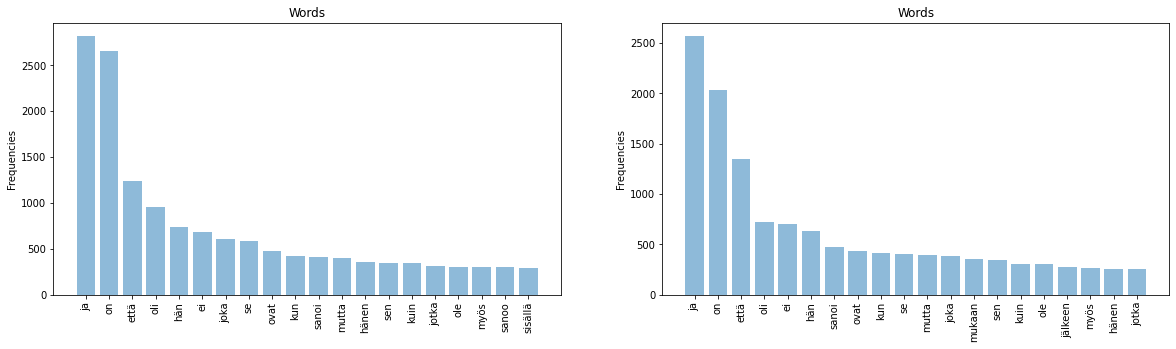

In [74]:
plot_frequencies(top_df_0_reference, top_df_0_translation)

<Figure size 432x288 with 0 Axes>

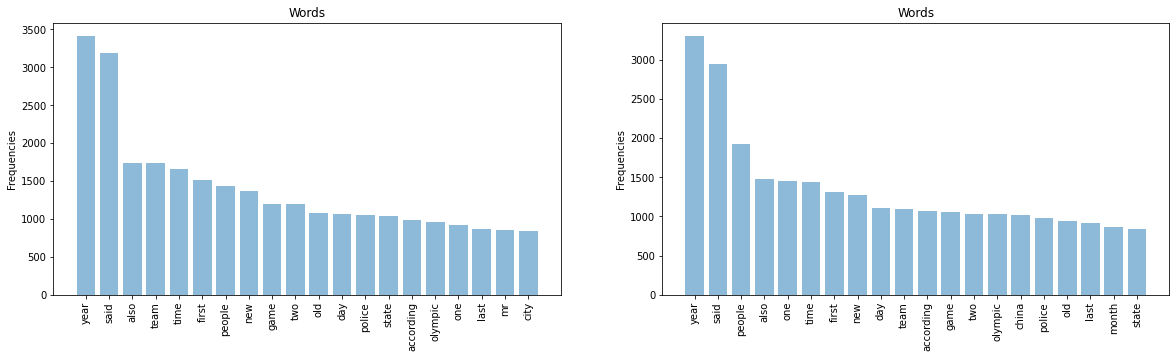

In [75]:
plot_frequencies(top_df_1_reference, top_df_1_translation)

<Figure size 432x288 with 0 Axes>

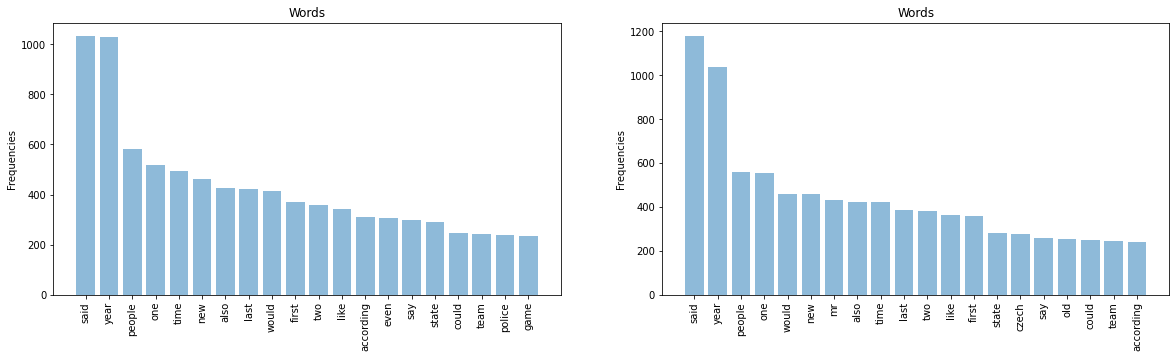

In [76]:
plot_frequencies(top_df_2_reference, top_df_2_translation)

<Figure size 432x288 with 0 Axes>

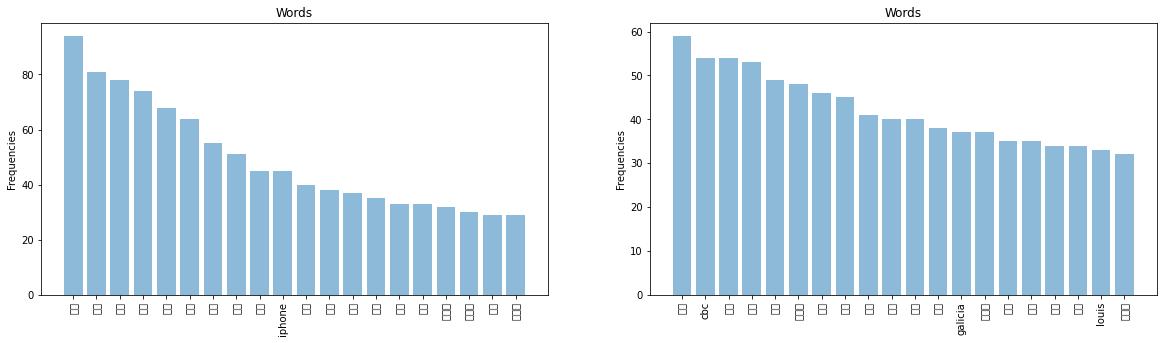

In [77]:
plot_frequencies(top_df_3_reference, top_df_3_translation)

<Figure size 432x288 with 0 Axes>

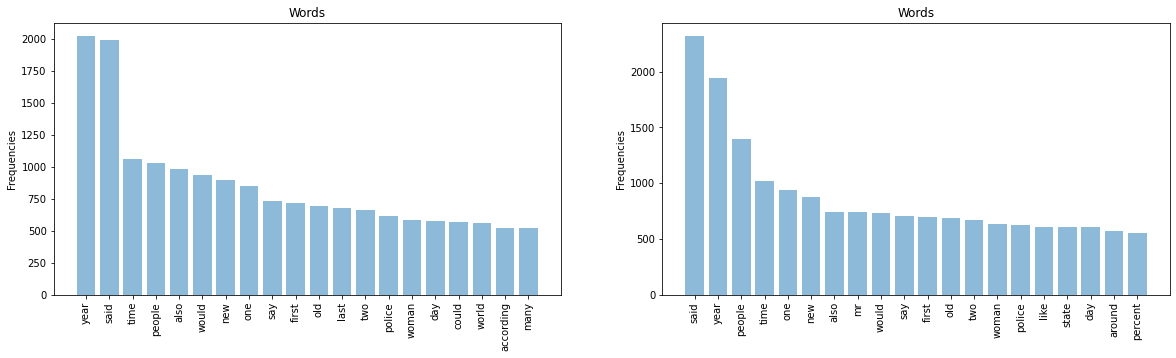

In [78]:
plot_frequencies(top_df_4_reference, top_df_4_translation)

<Figure size 432x288 with 0 Axes>

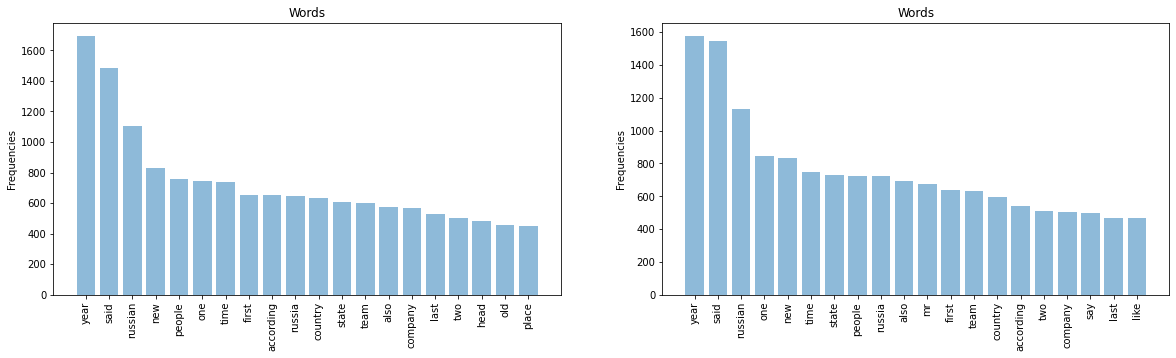

In [79]:
plot_frequencies(top_df_5_reference, top_df_5_translation)

<Figure size 432x288 with 0 Axes>

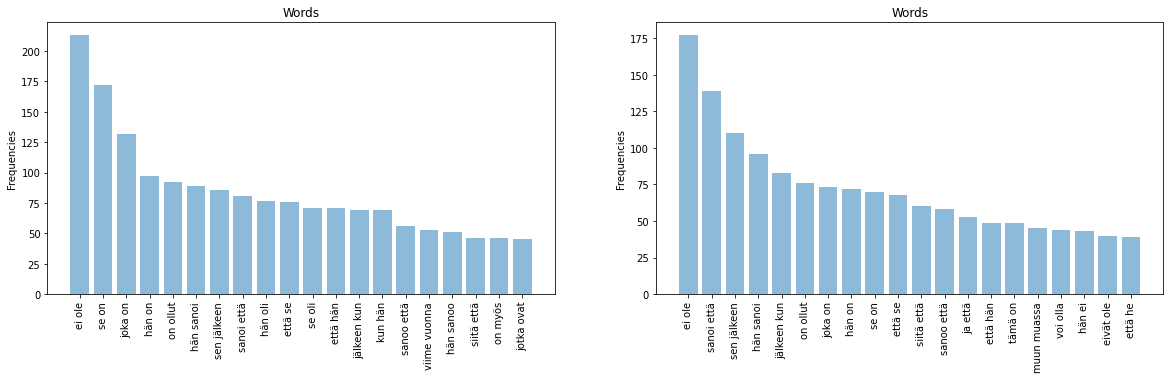

In [80]:
top_df_0_reference_2 = get_top_n_grams(corpora[0]['reference'], top_k=20, n=2)
top_df_0_translation_2 = get_top_n_grams(corpora[0]['translation'], top_k=20, n=2)

plot_frequencies(top_df_0_reference_2, top_df_0_translation_2)

<Figure size 432x288 with 0 Axes>

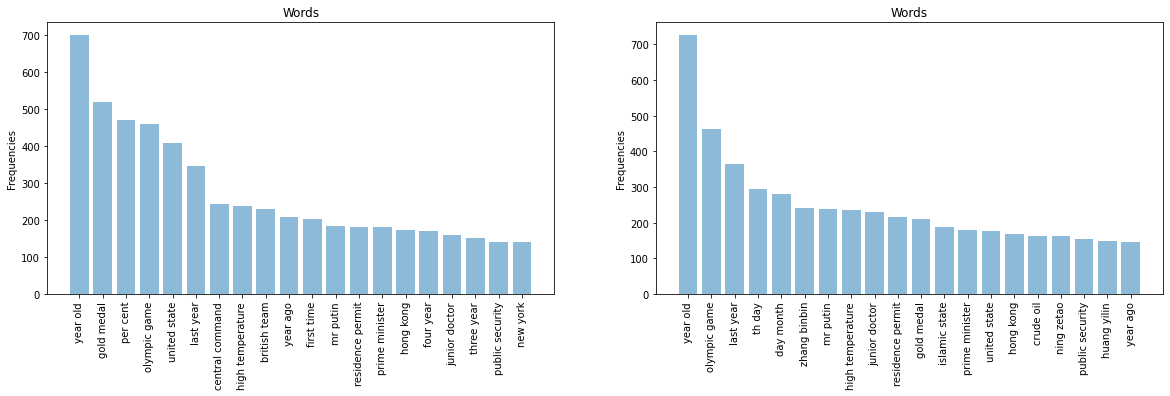

In [81]:
top_df_1_reference_2 = get_top_n_grams(corpora[1]['reference'], top_k=20, n=2)
top_df_1_translation_2 = get_top_n_grams(corpora[1]['translation'], top_k=20, n=2)

plot_frequencies(top_df_1_reference_2, top_df_1_translation_2)

<Figure size 432x288 with 0 Axes>

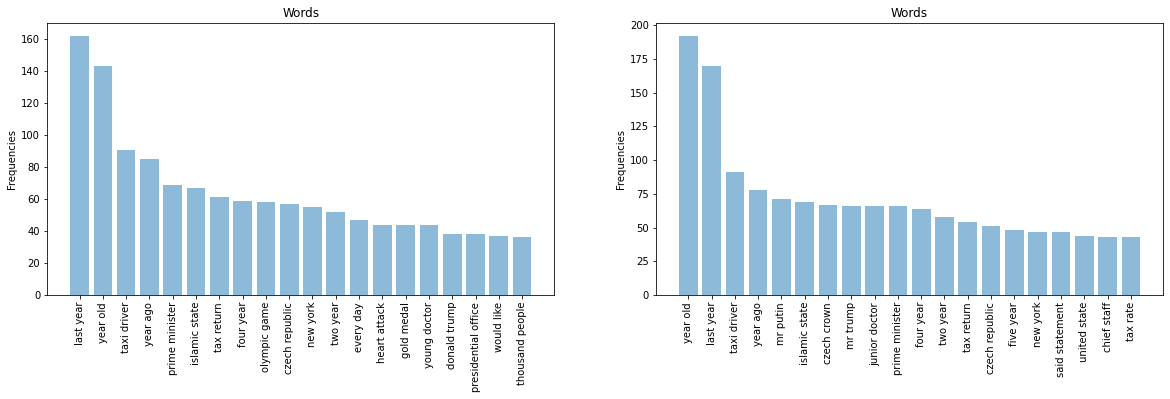

In [82]:
top_df_2_reference_2 = get_top_n_grams(corpora[2]['reference'], top_k=20, n=2)
top_df_2_translation_2 = get_top_n_grams(corpora[2]['translation'], top_k=20, n=2)

plot_frequencies(top_df_2_reference_2, top_df_2_translation_2)

<Figure size 432x288 with 0 Axes>

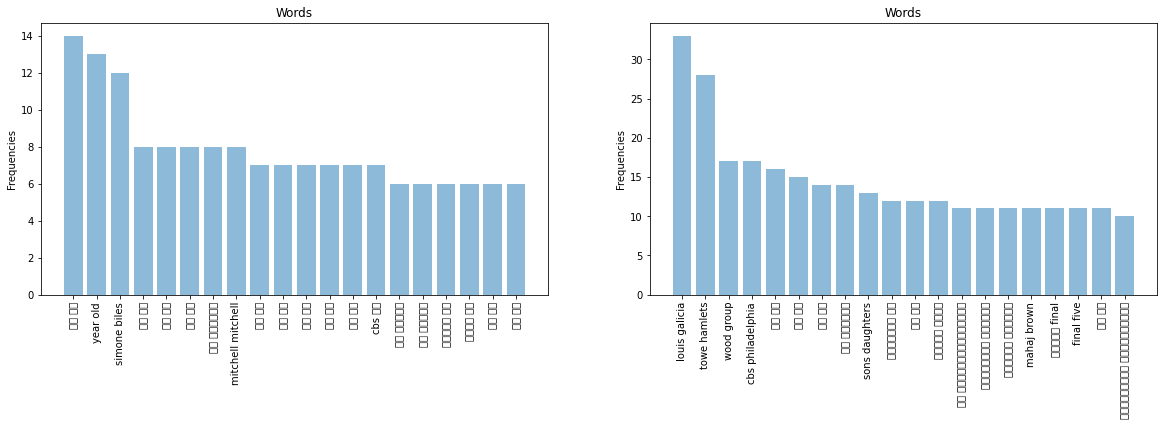

In [83]:
top_df_3_reference_2 = get_top_n_grams(corpora[3]['reference'], top_k=20, n=2)
top_df_3_translation_2 = get_top_n_grams(corpora[3]['translation'], top_k=20, n=2)

plot_frequencies(top_df_3_reference_2, top_df_3_translation_2)

<Figure size 432x288 with 0 Axes>

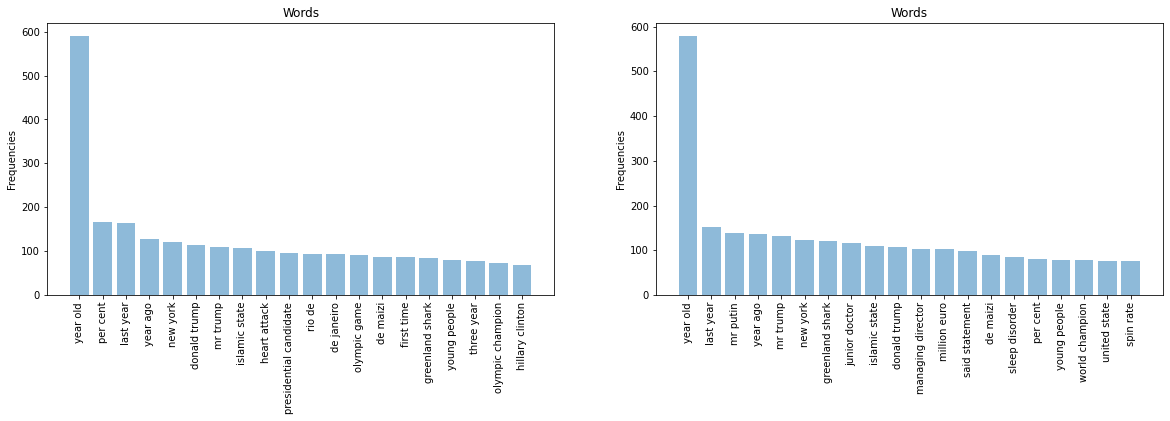

In [84]:
top_df_4_reference_2 = get_top_n_grams(corpora[4]['reference'], top_k=20, n=2)
top_df_4_translation_2 = get_top_n_grams(corpora[4]['translation'], top_k=20, n=2)

plot_frequencies(top_df_4_reference_2, top_df_4_translation_2)

<Figure size 432x288 with 0 Axes>

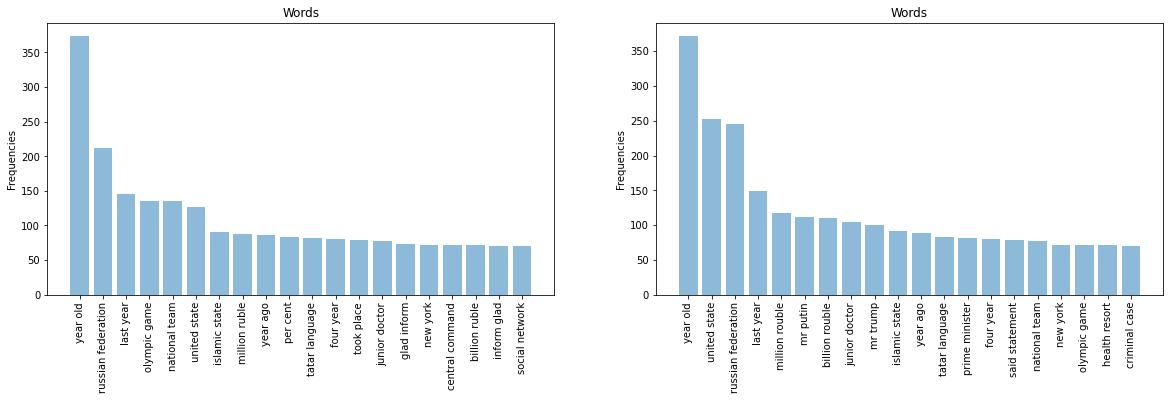

In [85]:
top_df_5_reference_2 = get_top_n_grams(corpora[5]['reference'], top_k=20, n=2)
top_df_5_translation_2 = get_top_n_grams(corpora[5]['translation'], top_k=20, n=2)

plot_frequencies(top_df_5_reference_2, top_df_5_translation_2)

### Evolution Methods


#### BLEU Scores - Bi-Lingual Evaluation Understudy

In [86]:
#Calculate BLEU Score for the entire Corpora 
for i in tqdm(range(len(corpus))):
    #Temp Series to store the BLEU-4 scores (initiated as 0 and type float64)
    bleus=np.zeros(corpora[i].shape[0],'float64')
    for j in tqdm(range(corpora[i].shape[0])):
        #The human translation
        reference=corpora[i].loc[j].reference.lower().split()
        #The automatic translation bein evaluated
        translation=corpora[i].loc[j].translation.lower().split() 
        
        if not reference:
             continue
        if not translation:
             continue
                
        #Calculate the BLEU-4 (cumulative 4-gram BLEU score)
        bleus[j]=sentence_bleu(translation,reference, weights=(0.25, 0.25, 0.25, 0.25))
        corpora[i]['BLEU']=bleus

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6748 [00:00<?, ?it/s]

  0%|          | 0/26418 [00:00<?, ?it/s]

  0%|          | 0/11585 [00:00<?, ?it/s]

  0%|          | 0/10221 [00:00<?, ?it/s]

  0%|          | 0/21704 [00:00<?, ?it/s]

  0%|          | 0/17977 [00:00<?, ?it/s]

In [87]:
#Examine BLEU-4 Score for one language pair
corpora[1].head(5)

,source,reference,translation,z-score,avg-score,annotators,BLEU
0,他性格活泼，这对英国赛马来说是好事，但是除此之外，他还是一位不可思议的骑师。,character good british horse addition incredib...,lively character good british racing incredibl...,0.625559,92.75,4,0.0
1,近日刚搬至旧金山的一位28岁厨师本周被发现死于当地一家商场的楼梯间。,chef moved san francisco found dead stair loca...,year old chef recently moved san francisco fou...,0.550952,92.00,4,0.0
2,去年，有官员表示，胡克先生的团队所得出的结论是针对伊斯兰国炼油厂的空袭并未大幅削减恐怖组织的...,last year official said mr hooker team conclud...,last year official said mr hooker team conclud...,0.540814,89.00,5,0.0
3,尤其值得玩味的是政府对于饥饿民众们的回应，比如总统市民赫伯特·胡佛“别人的事我可管不了”的态度。,particularly interesting note government respo...,especially savory account government response ...,-0.793944,49.50,4,0.0
4,不过，从20世纪90年代至今，人类共进行了18次火星探测，而月球探测只进行了14次。,however present human being carried mar probe ...,however ever since total human exploration car...,0.046532,77.50,4,0.0


In [88]:
#Empty list to keep correlations of BLEU and Z-Score
correl=[]
KendallT=[]
KendallP=[]

#Clalculate the correlation of columns BLEU and Z-Score on all corpora
for i in range(len(corpus)):
    correl.append(corpora[i].BLEU.corr(corpora[i]['z-score']))
    T,P=stats.kendalltau(corpora[i].BLEU, corpora[i]['z-score'])
    KendallT.append(T)
    KendallP.append(P)
    
#Create a DataFrame with the correlation calculated for each language pair
corrbleu=pd.DataFrame(np.array([corpus,correl,KendallT,KendallP])).T

#Rename the columns
corrbleu.columns = ['Corpus', 'BLEU (Pearson)','BLEU (Kendall Tau-T)','BLEU (Kendall Tau-P)']

#calculate the mean of the correlations in the entire corpora
avgPearson=corrbleu['BLEU (Pearson)'].astype(float).mean()
avgTau=corrbleu['BLEU (Kendall Tau-T)'].astype(float).mean()
avgP=corrbleu['BLEU (Kendall Tau-P)'].astype(float).mean()
corrbleu=corrbleu.append({'Corpus':'Average','BLEU (Pearson)':avgPearson,\
                         'BLEU (Kendall Tau-T)':avgTau,'BLEU (Kendall Tau-P)':avgP}, ignore_index=True)
corrbleu.set_index('Corpus', inplace=True)
corrbleu

,BLEU (Pearson),BLEU (Kendall Tau-T),BLEU (Kendall Tau-P)
Corpus,,,
en-fi,-0.00019993460086985582,-0.010476235604099505,0.28565658813005235
zh-en,-0.006744183694038605,0.00899648940056324,0.0706853078507699
cs-en,-0.013286058711302853,-0.03257687216333275,1.4403239002610465e-05
en-zh,-0.005862317054644117,0.04898185951910319,4.5031245734006386e-10
de-en,0.007824270931235564,-0.005946211525284525,0.2774360547036304
ru-en,0.0031452312853111407,-0.0037329959255179416,0.5360869163567754
Average,-0.00252,0.000874,0.19498


In [89]:
%%time
#create a backup-point for corpora
for i in range(len(corpus)):
    corpora[i].to_excel('bckcorpora/'+corpus[i]+'.xlsx')

CPU times: user 28.6 s, sys: 929 ms, total: 29.5 s
Wall time: 30.5 s


#### ROUGE-N

In [90]:
#To eliminate rows with empty references
#Copora 1
corpora[1] = corpora[1][corpora[1].reference != '']
#Copora 2
corpora[2] = corpora[2][corpora[2].reference != '']
#Copora 3
corpora[3] = corpora[3][corpora[3].reference != '']
#Copora 4
corpora[4] = corpora[4][corpora[4].reference != '']
#Copora 5
corpora[5] = corpora[5][corpora[5].reference != '']

In [91]:
#To eliminate rows with empty translation
#Copora 1
corpora[1] = corpora[1][corpora[1].translation != '']
#Copora 2
corpora[2] = corpora[2][corpora[2].translation != '']
#Copora 3
corpora[3] = corpora[3][corpora[3].translation != '']
#Copora 4
corpora[4] = corpora[4][corpora[4].translation != '']
#Copora 5
corpora[5] = corpora[5][corpora[5].translation != '']

In [92]:
%%time
#Empty list to store Rouge-N scores
rgn=[]
#Instantiate Rouge
rouge = Rouge()
#Get the Rouge-N scores for each language pair
for i in tqdm(range(len(corpus))):
    rgn.append(pd.DataFrame(rouge.get_scores(corpora[i].translation, corpora[i].reference)))


  0%|          | 0/6 [00:00<?, ?it/s]

CPU times: user 28 s, sys: 385 ms, total: 28.4 s
Wall time: 29.7 s


In [93]:
#validate output
rgn[2].head(5)

,rouge-1,rouge-2,rouge-l
0,"{'f': 0.624999995, 'p': 0.625, 'r': 0.625}","{'f': 0.4285714235714286, 'p': 0.4285714285714...","{'f': 0.624999995, 'p': 0.625, 'r': 0.625}"
1,"{'f': 0.5999999950000001, 'p': 0.6, 'r': 0.6}","{'f': 0.24999999500000009, 'p': 0.25, 'r': 0.25}","{'f': 0.5999999950000001, 'p': 0.6, 'r': 0.6}"
2,"{'f': 0.6086956474102081, 'p': 0.5, 'r': 0.777...","{'f': 0.28571428099773244, 'p': 0.230769230769...","{'f': 0.6086956474102081, 'p': 0.5, 'r': 0.777..."
3,"{'f': 0.5999999950000001, 'p': 0.6, 'r': 0.6}","{'f': 0.4999999950000001, 'p': 0.5, 'r': 0.5}","{'f': 0.5999999950000001, 'p': 0.6, 'r': 0.6}"
4,"{'f': 0.3333333283333334, 'p': 0.3333333333333...","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.3333333283333334, 'p': 0.3333333333333..."


In [94]:
#PEARSON CORRELATION
#Empty lists to store the dataframes with Rouge-1, Rouge-2, Rouge-L scores split into columns
rg1=[]
rg2=[]
rgl=[]

#For each column of rgn store the 'exlosion' of its dictionay in a new dataframe
for i in tqdm(range(len(corpus))):
    #'exploding' dictionaries in a temp dataframe to preserve the other colmns
    temp=rgn[i]
    rg1.append(pd.json_normalize(temp['rouge-1']))
    rg1[i].columns=["ROUGE-1 F1-Score","ROUGE-1 Precision","ROUGE-1 Recall"]
    temp=rgn[i]
    rg2.append(pd.json_normalize(temp['rouge-2']))
    rg2[i].columns=["ROUGE-2 F1-Score","ROUGE-2 Precision","ROUGE-2 Recall"]
    temp=rgn[i]
    rgl.append(pd.json_normalize(temp['rouge-l']))
    rgl[i].columns=["ROUGE-L F1-Score","ROUGE-L Precision","ROUGE-L Recall"]

  0%|          | 0/6 [00:00<?, ?it/s]

In [95]:
rg1[0].head(5)

,ROUGE-1 F1-Score,ROUGE-1 Precision,ROUGE-1 Recall
0,0.521739,0.500000,0.545455
1,0.444444,0.444444,0.444444
2,0.421053,0.400000,0.444444
3,0.571429,0.461538,0.750000
4,0.250000,0.250000,0.250000


In [96]:
for i in tqdm(range(len(corpus))):
    corpora[i]=pd.concat([corpora[i],rg1[i],rg2[i],rgl[i]], axis=1, join='inner')
#Corpora example
corpora[3].head(1)

  0%|          | 0/6 [00:00<?, ?it/s]

,source,reference,translation,z-score,avg-score,annotators,BLEU,ROUGE-1 F1-Score,ROUGE-1 Precision,ROUGE-1 Recall,ROUGE-2 F1-Score,ROUGE-2 Precision,ROUGE-2 Recall,ROUGE-L F1-Score,ROUGE-L Precision,ROUGE-L Recall
0,"""In the GISS model's simulation, Venus' slow s...",GSIS的科学家AnthonyDelGenio在新闻稿中解释说 在GISS模型的模拟模型中 ...,戈达德太空研究所科学家安东尼·德尔·杰尼奥在新闻发布会上解释说 在戈达德太空研究所的模型模拟...,-1.171867,50.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
#PEARSON Correlation of Rouge-N Stats and Z-Score
#Empty list to keep correlations of Rouge-N and Z-Score
correl1=[]
correl2=[]
correl3=[]
correl4=[]
correl5=[]
correl6=[]
correl7=[]
correl8=[]
correl9=[]
#Clalculate the correlation of columns ROUGE... and Z-Score on all corpora
for i in range(len(corpus)):
    correl1.append(corpora[i]['ROUGE-1 F1-Score'].corr(corpora[i]['z-score']))
    correl1[i]=round(correl1[i],2)
    correl2.append(corpora[i]['ROUGE-1 Precision'].corr(corpora[i]['z-score']))
    correl2[i]=round(correl2[i],2)
    correl3.append(corpora[i]['ROUGE-1 Recall'].corr(corpora[i]['z-score']))
    correl3[i]=round(correl3[i],2)
    correl4.append(corpora[i]['ROUGE-2 F1-Score'].corr(corpora[i]['z-score']))
    correl4[i]=round(correl4[i],2)
    correl5.append(corpora[i]['ROUGE-2 Precision'].corr(corpora[i]['z-score']))
    correl5[i]=round(correl5[i],2)
    correl6.append(corpora[i]['ROUGE-2 Recall'].corr(corpora[i]['z-score']))
    correl6[i]=round(correl6[i],2)
    correl7.append(corpora[i]['ROUGE-L F1-Score'].corr(corpora[i]['z-score']))
    correl7[i]=round(correl7[i],2)
    correl8.append(corpora[i]['ROUGE-L Precision'].corr(corpora[i]['z-score']))
    correl8[i]=round(correl8[i],2)
    correl9.append(corpora[i]['ROUGE-L Recall'].corr(corpora[i]['z-score']))
    correl9[i]=round(correl9[i],2)
#Create a DataFrame with the correlation calculated for each language pair
corrouge=pd.DataFrame(np.array([corpus,correl1,correl2,correl3,correl4,correl5,correl6,correl7,correl8,correl9])).T
#Rename the columns
corrouge.columns = ['Corpus', 'ROUGE-1 F1-Score', 'ROUGE-1 Precision', 'ROUGE-1 Recall', 'ROUGE-2 F1-Score',\
                    'ROUGE-2 Precision', 'ROUGE-2 Recall', 'ROUGE-L F1-Score', 'ROUGE-L Precision', 'ROUGE-L Recall',]
#calculate the mean of the correlations in the entire corpora
avg1=corrouge['ROUGE-1 F1-Score'].astype(float).mean()
avg2=corrouge['ROUGE-1 Precision'].astype(float).mean()
avg3=corrouge['ROUGE-1 Recall'].astype(float).mean()
avg4=corrouge['ROUGE-2 F1-Score'].astype(float).mean()
avg5=corrouge['ROUGE-2 Precision'].astype(float).mean()
avg6=corrouge['ROUGE-2 Recall'].astype(float).mean()
avg7=corrouge['ROUGE-L F1-Score'].astype(float).mean()
avg8=corrouge['ROUGE-L Precision'].astype(float).mean()
avg9=corrouge['ROUGE-L Recall'].astype(float).mean()
corrouge=corrouge.append({'Corpus':'Average','ROUGE-1 F1-Score':round(avg1,2),'ROUGE-1 Precision':round(avg2,2),\
                          'ROUGE-1 Recall':round(avg3,2),'ROUGE-2 F1-Score':round(avg4,2),'ROUGE-2 Precision':round(avg5,2),\
                          'ROUGE-2 Recall':round(avg6,2),'ROUGE-L F1-Score':round(avg7,2),'ROUGE-L Precision':round(avg8,2),\
                          'ROUGE-L Recall':round(avg9,2),}, ignore_index=True)
corrouge.set_index('Corpus', inplace=True)
corrouge

,ROUGE-1 F1-Score,ROUGE-1 Precision,ROUGE-1 Recall,ROUGE-2 F1-Score,ROUGE-2 Precision,ROUGE-2 Recall,ROUGE-L F1-Score,ROUGE-L Precision,ROUGE-L Recall
Corpus,,,,,,,,,
en-fi,0.54,0.54,0.51,0.43,0.44,0.42,0.52,0.53,0.5
zh-en,0.16,0.16,0.14,0.15,0.15,0.14,0.16,0.17,0.14
cs-en,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.02,0.03
en-zh,0.16,0.15,0.15,0.09,0.09,0.09,0.16,0.15,0.16
de-en,0.03,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.04
ru-en,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
Average,0.16,0.15,0.15,0.12,0.13,0.12,0.16,0.16,0.15


In [98]:
#Kedall Tau T Value of Rouge-N Stats and Z-Score
#Empty list to keep correlations of Rouge-N and Z-Score
correl1a=[]
correl1b=[]
correl2a=[]
correl2b=[]
correl3a=[]
correl3b=[]
correl4a=[]
correl4b=[]
correl5a=[]
correl5b=[]
correl6a=[]
correl6b=[]
correl7a=[]
correl7b=[]
correl8a=[]
correl8b=[]
correl9a=[]
correl9b=[]

#Clalculate the correlation of columns ROUGE... and Z-Score on all corpora
for i in range(len(corpus)):
    T,P=stats.kendalltau(corpora[i]['ROUGE-1 F1-Score'], corpora[i]['z-score'])
    correl1a.append(round(T,2))
    correl1b.append(round(P,2))
    T,P=stats.kendalltau(corpora[i]['ROUGE-1 Precision'], corpora[i]['z-score'])
    correl2a.append(round(T,2))
    correl2b.append(round(P,2))
    T,P=stats.kendalltau(corpora[i]['ROUGE-1 Recall'], corpora[i]['z-score'])
    correl3a.append(round(T,2))
    correl3b.append(round(P,2))
    T,P=stats.kendalltau(corpora[i]['ROUGE-2 F1-Score'], corpora[i]['z-score'])
    correl4a.append(round(T,2))
    correl4b.append(round(P,2))
    T,P=stats.kendalltau(corpora[i]['ROUGE-2 F1-Score'], corpora[i]['z-score'])
    correl5a.append(round(T,2))
    correl5b.append(round(P,2))
    T,P=stats.kendalltau(corpora[i]['ROUGE-2 F1-Score'], corpora[i]['z-score'])
    correl6a.append(round(T,2))
    correl6b.append(round(P,2))
    T,P=stats.kendalltau(corpora[i]['ROUGE-L F1-Score'], corpora[i]['z-score'])
    correl7a.append(round(T,2))
    correl7b.append(round(P,2))
    T,P=stats.kendalltau(corpora[i]['ROUGE-L F1-Score'], corpora[i]['z-score'])
    correl8a.append(round(T,2))
    correl8b.append(round(P,2))
    T,P=stats.kendalltau(corpora[i]['ROUGE-L F1-Score'], corpora[i]['z-score'])
    correl9a.append(round(T,2))
    correl9b.append(round(P,2))

#Create DataFrames with the Kandall T and P values calculated for each language pair
corrougeKT=pd.DataFrame(np.array([corpus,correl1a,correl2a,correl3a,correl4a,\
                                  correl5a,correl6a,correl7a,correl8b,\
                                  correl9a])).T
corrougeKP=pd.DataFrame(np.array([corpus,correl1b,correl2b,correl3b,correl4b,\
                                  correl5b,correl6b,correl7b,correl8b,\
                                  correl9b])).T

#Rename the columns
corrougeKT.columns = ['Corpus', 'ROUGE-1 F1-Score', 'ROUGE-1 Precision', 'ROUGE-1 Recall', 'ROUGE-2 F1-Score',\
                    'ROUGE-2 Precision', 'ROUGE-2 Recall', 'ROUGE-L F1-Score', 'ROUGE-L Precision', 'ROUGE-L Recall',]
corrougeKP.columns = ['Corpus', 'ROUGE-1 F1-Score', 'ROUGE-1 Precision', 'ROUGE-1 Recall', 'ROUGE-2 F1-Score',\
                    'ROUGE-2 Precision', 'ROUGE-2 Recall', 'ROUGE-L F1-Score', 'ROUGE-L Precision', 'ROUGE-L Recall',]

#calculate the mean of the correlations in the entire corpora
avg1a=corrougeKT['ROUGE-1 F1-Score'].astype(float).mean()
avg2a=corrougeKT['ROUGE-1 Precision'].astype(float).mean()
avg3a=corrougeKT['ROUGE-1 Recall'].astype(float).mean()
avg4a=corrougeKT['ROUGE-2 F1-Score'].astype(float).mean()
avg5a=corrougeKT['ROUGE-2 Precision'].astype(float).mean()
avg6a=corrougeKT['ROUGE-2 Recall'].astype(float).mean()
avg7a=corrougeKT['ROUGE-L F1-Score'].astype(float).mean()
avg8a=corrougeKT['ROUGE-L Precision'].astype(float).mean()
avg9a=corrougeKT['ROUGE-L Recall'].astype(float).mean()
corrougeKT=corrougeKT.append({'Corpus':'Average','ROUGE-1 F1-Score':round(avg1a,2),'ROUGE-1 Precision':round(avg2a,2),\
                          'ROUGE-1 Recall':round(avg3a,2),'ROUGE-2 F1-Score':round(avg4a,2),\
                          'ROUGE-2 Precision':round(avg5a,2),'ROUGE-2 Recall':round(avg6a,2),\
                          'ROUGE-L F1-Score':round(avg7a,2),'ROUGE-L Precision':round(avg8a,2),\
                          'ROUGE-L Recall':round(avg9a,2)}, ignore_index=True)
corrougeKT.set_index('Corpus', inplace=True)
corrougeKT

,ROUGE-1 F1-Score,ROUGE-1 Precision,ROUGE-1 Recall,ROUGE-2 F1-Score,ROUGE-2 Precision,ROUGE-2 Recall,ROUGE-L F1-Score,ROUGE-L Precision,ROUGE-L Recall
Corpus,,,,,,,,,
en-fi,0.35,0.36,0.34,0.3,0.3,0.3,0.34,0.0,0.34
zh-en,0.11,0.11,0.1,0.1,0.1,0.1,0.11,0.0,0.11
cs-en,0.02,0.02,0.02,0.01,0.01,0.01,0.02,0.0,0.02
en-zh,0.12,0.12,0.12,0.07,0.07,0.07,0.12,0.0,0.12
de-en,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.0,0.03
ru-en,0.03,0.03,0.03,0.02,0.02,0.02,0.03,0.0,0.03
Average,0.11,0.11,0.11,0.09,0.09,0.09,0.11,0.0,0.11


In [99]:
#calculate the mean of the correlations in the entire corpora
avg1b=corrougeKP['ROUGE-1 F1-Score'].astype(float).mean()
avg2b=corrougeKP['ROUGE-1 Precision'].astype(float).mean()
avg3b=corrougeKP['ROUGE-1 Recall'].astype(float).mean()
avg4b=corrougeKP['ROUGE-2 F1-Score'].astype(float).mean()
avg5b=corrougeKP['ROUGE-2 Precision'].astype(float).mean()
avg6b=corrougeKP['ROUGE-2 Recall'].astype(float).mean()
avg7b=corrougeKP['ROUGE-L F1-Score'].astype(float).mean()
avg8b=corrougeKP['ROUGE-L Precision'].astype(float).mean()
avg9b=corrougeKP['ROUGE-L Recall'].astype(float).mean()
corrougeKP=corrougeKP.append({'Corpus':'Average','ROUGE-1 F1-Score':round(avg1b,2),'ROUGE-1 Precision':round(avg2b,2),\
                          'ROUGE-1 Recall':round(avg3b,2),'ROUGE-2 F1-Score':round(avg4b,2),\
                          'ROUGE-2 Precision':round(avg5b,2),'ROUGE-2 Recall':round(avg6b,2),\
                          'ROUGE-L F1-Score':round(avg7b,2),'ROUGE-L Precision':round(avg8b,2),\
                          'ROUGE-L Recall':round(avg9b,2)}, ignore_index=True)
corrougeKP.set_index('Corpus', inplace=True)
corrougeKP

,ROUGE-1 F1-Score,ROUGE-1 Precision,ROUGE-1 Recall,ROUGE-2 F1-Score,ROUGE-2 Precision,ROUGE-2 Recall,ROUGE-L F1-Score,ROUGE-L Precision,ROUGE-L Recall
Corpus,,,,,,,,,
en-fi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zh-en,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cs-en,0.01,0.02,0.01,0.06,0.06,0.06,0.0,0.0,0.0
en-zh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
de-en,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ru-en,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Average,0.0,0.0,0.0,0.01,0.01,0.01,0.0,0.0,0.0


#### WMD - World Movers Distance

In [100]:
%%time
if not(os.path.isfile('GoogleNews-vectors-negative300.bin')):
    if not(os.path.isfile('GoogleNews-vectors-negative300.bin.gz')):
        urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz",\
                                   "GoogleNews-vectors-negative300.bin.gz")
    with gzip.open('GoogleNews-vectors-negative300.bin.gz', 'rb') as f_in:
        with open('GoogleNews-vectors-negative300.bin', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

CPU times: user 29 s, sys: 3.67 s, total: 32.7 s
Wall time: 34.1 s


In [101]:
#To reset_index of each corpora
#Corpora 0
corpora[0].reset_index(inplace=True)
#Corpora 1
corpora[1].reset_index(inplace=True)
#Corpora 2
corpora[2].reset_index(inplace=True)
#Corpora 3
corpora[3].reset_index(inplace=True)
#Corpora 4
corpora[4].reset_index(inplace=True)
#Corpora 5
corpora[5].reset_index(inplace=True)

In [102]:
#create a copy of the corpora and calculate the distance
corp=corpora

for i in tqdm(range(len(corpus))):
    results=np.zeros(corpora[i].shape[0],'float64')
    #corp[i]['reference'].apply(lambda x : [word for word in x.lower().split() if word not in all_stopwords])
    #corp[i]['translation'].apply(lambda x : [word for word in x.lower().split() if word not in all_stopwords])
    for j in tqdm(range(corp[i].shape[0])):
        results[i]=model.wmdistance(corp[i].loc[j].reference,corp[i].loc[j].translation)
    corpora[i]['WMDistance']=results

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6748 [00:02<?, ?it/s]

  0%|          | 0/26406 [00:00<?, ?it/s]

  0%|          | 0/11543 [00:00<?, ?it/s]

  0%|          | 0/10219 [00:00<?, ?it/s]

  0%|          | 0/21658 [00:00<?, ?it/s]

  0%|          | 0/17953 [00:00<?, ?it/s]

In [103]:
#Corpora example
corpora[0].head(5)

,index,source,reference,translation,z-score,avg-score,annotators,BLEU,ROUGE-1 F1-Score,ROUGE-1 Precision,ROUGE-1 Recall,ROUGE-2 F1-Score,ROUGE-2 Precision,ROUGE-2 Recall,ROUGE-L F1-Score,ROUGE-L Precision,ROUGE-L Recall,WMDistance
0,0,"You can turn yourself into a pineapple, a dog ...",VOIT MUUTTAA ITSESI ANANASTA KOIRASTA TAI ROY ...,VOIT MUUTTAA ITSESI ANANAKSEKSI KOIRAKSI TAI H...,-0.286195,34.20,5,0.000000e+00,0.521739,0.500000,0.545455,0.285714,0.272727,0.300000,0.521739,0.500000,0.545455,0.175511
1,1,Also shot were three men: two 29-year-olds and...,MYÖS AMMUTTIIN KOLME MIESTÄ KAKSI VUOTIAITA JA...,MYÖS KOLMEA MIESTÄ AMMUTTIIN KAHTA VUOTIASTA J...,0.547076,58.40,5,0.000000e+00,0.444444,0.444444,0.444444,0.000000,0.000000,0.000000,0.352941,0.375000,0.333333,0.000000
2,2,The information is stored at the cash register...,TIEDOT TALLENNETAAN KASSAKONEISIIN JOKA TAPAUK...,TIEDOT KUITENKIN TALLENTUVAT KASSOILLA JOKA TA...,1.122476,74.60,5,0.000000e+00,0.421053,0.400000,0.444444,0.117647,0.111111,0.125000,0.421053,0.400000,0.444444,0.000000
3,3,Xinhua says that there were traces of hydrochl...,XINHUA KERTOO ETTÄ XINYIN NÄYTTEESTÄ OLI SUNNU...,XINHUA KERTOO ETTÄ XINYIN SUNNUNTAINA ANTAMAST...,0.383095,53.60,5,0.000000e+00,0.571429,0.461538,0.750000,0.315789,0.250000,0.428571,0.476190,0.384615,0.625000,0.000000
4,4,"MacDonald, who was brought on board CBC's comm...",VOITAISIIN KUULLA CBD N KOMMENTTITIIMIN TOIMIT...,MACDONALDIN JOKA TULI CBC N SELOSTAJATIIMIIN T...,-0.493065,32.25,4,9.109160e-232,0.250000,0.250000,0.250000,0.066667,0.066667,0.066667,0.187500,0.187500,0.187500,0.000000


In [104]:
#Empty list to keep correlations of WMDistance and Z-Score
correl=[]
KendallT=[]
KendallP=[]
#Clalculate the correlation of columns WMDistance and Z-Score on all corpora
for i in range(len(corpus)):
    correl.append(round(corpora[i]['WMDistance'].corr(corpora[i]['z-score']),2))
    T,P=stats.kendalltau(corpora[i]['WMDistance'], corpora[i]['z-score'])
    KendallT.append(round(T,2))
    KendallP.append(round(P,2))
#Create a DataFrame with the correlation calculated for each language pair
corrWMDistance=pd.DataFrame(np.array([corpus,correl,KendallT,KendallP])).T
#Rename the columns
corrWMDistance.columns = ['Corpus', 'WMDistance (Pearson)','WMDistance (Kendall Tau-T)','WMDistance (Kendall Tau-P)']
#calculate the mean of the correlations in the entire corpora
avgPearson=corrWMDistance['WMDistance (Pearson)'].astype(float).mean()
avgTau=corrWMDistance['WMDistance (Kendall Tau-T)'].astype(float).mean()
avgP=corrWMDistance['WMDistance (Kendall Tau-P)'].astype(float).mean()
corrWMDistance=corrWMDistance.append({'Corpus':'Average','WMDistance (Pearson)':round(avgPearson,2),\
                         'WMDistance (Kendall Tau-T)':round(avgTau,2),'WMDistance (Kendall Tau-P)':round(avgP,2)},\
                         ignore_index=True)
corrWMDistance.set_index('Corpus', inplace=True)
corrWMDistance

,WMDistance (Pearson),WMDistance (Kendall Tau-T),WMDistance (Kendall Tau-P)
Corpus,,,
en-fi,-0.0,-0.0,0.85
zh-en,0.0,0.0,0.44
cs-en,0.01,0.01,0.25
en-zh,-0.03,-0.01,0.09
de-en,0.0,0.0,0.89
ru-en,0.01,0.01,0.12
Average,-0.0,0.0,0.44


In [115]:
cd Documents/Github/TextMining

/Users/catarinamoreira/Documents/GitHub/TextMining


In [116]:
%%time
#create a backup-point for corpora
for i in range(len(corpus)):
    corpora[i].to_excel('bckcorpora/'+corpus[i]+'.xlsx')

CPU times: user 50.1 s, sys: 2.12 s, total: 52.3 s
Wall time: 54.4 s


#### BERT-Score

In [117]:
from bert_score import score

In [118]:
#preparation
#transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

In [ ]:
#%%time
BSP=[]
BSR=[]
BSF1=[]
for i in tqdm(range(len(corpus))):
    Ptemp, Rtemp, F1temp = score(list(corpora[i].translation), list(corpora[i].reference),\
                                 lang=corpus[i][-2:], verbose=True)
    BSP.append(Ptemp)
    BSR.append(Rtemp)
    BSF1.append(F1temp)

  0%|          | 0/6 [00:00<?, ?it/s]

calculating scores...
computing bert embedding.


  0%|          | 0/148 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/106 [00:00<?, ?it/s]

done in 845.82 seconds, 7.98 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/425 [00:00<?, ?it/s]

In [ ]:
a = corpora
for i in range(len(corpora)):
    corpora[i]=pd.concat([corpora[i],pd.DataFrame(BSP[i].numpy()),pd.DataFrame(BSR[i].numpy()),\
                          pd.DataFrame(BSF1[i].numpy())], axis=1, join='inner')
    corpora[i].columns=['index',"source","reference","translation","z-score","avg-score","annotators","BLEU",\
                        "ROUGE-1 F1-Score","ROUGE-1 Precision","ROUGE-1 Recall","ROUGE-2 F1-Score","ROUGE-2 Precision",\
                        "ROUGE-2 Recall","ROUGE-L F1-Score","ROUGE-L Precision","ROUGE-L Recall",\
                        "WMDistance","BERT-Score Precision","BERT-Score Recall","BERT-Score F1-Score"]

In [ ]:
#create a backup-point for corpora
for i in range(len(corpus)):
    corpora[i].to_excel('bckcorpora/'+corpus[i]+'.xlsx')

In [ ]:
#PEARSON Correlation of BERT-Score Stats and Z-Score
#Empty list to keep correlations of BERT-Score and Z-Score
correl1=[]
correl2=[]
correl3=[]
#Calculate the correlation of columns BERT-Score... and Z-Score on all corpora
for i in range(len(corpus)):
    correl1.append(corpora[i]['BERT-Score F1-Score'].corr(corpora[i]['z-score']))
    correl1[i]=round(correl1[i],2)
    correl2.append(corpora[i]['BERT-Score Precision'].corr(corpora[i]['z-score']))
    correl2[i]=round(correl2[i],2)
    correl3.append(corpora[i]['BERT-Score Recall'].corr(corpora[i]['z-score']))
    correl3[i]=round(correl3[i],2)
#Create a DataFrame with the correlation calculated for each language pair
corBERTScore=pd.DataFrame(np.array([corpus,correl1,correl2,correl3])).T
#Rename the columns
corBERTScore.columns = ['Corpus', 'BERT-Score F1-Score', 'BERT-Score Precision', 'BERT-Score Recall']
#calculate the mean of the correlations in the entire corpora
avg1=corBERTScore['BERT-Score F1-Score'].astype(float).mean()
avg2=corBERTScore['BERT-Score Precision'].astype(float).mean()
avg3=corBERTScore['BERT-Score Recall'].astype(float).mean()
corBERTScore=corBERTScore.append({'Corpus':'Average','BERT-Score F1-Score':round(avg1,2),\
                                    'BERT-Score Precision':round(avg2,2),'BERT-Score Recall':round(avg3,2)}, ignore_index=True)
corBERTScore.set_index('Corpus', inplace=True)
corBERTScore

In [ ]:
#Kedall Tau T Value of Rouge-N Stats and Z-Score
#Empty list to keep correlations of Rouge-N and Z-Score
correl1a=[]
correl1b=[]
correl2a=[]
correl2b=[]
correl3a=[]
correl3b=[]

#Clalculate the correlation of columns ROUGE... and Z-Score on all corpora
for i in range(len(corpus)):
    T,P=stats.kendalltau(corpora[i]['BERT-Score F1-Score'], corpora[i]['z-score'])
    correl1a.append(round(T,2))
    correl1b.append(round(P,2))
    print(P)
    T,P=stats.kendalltau(corpora[i]['BERT-Score Precision'], corpora[i]['z-score'])
    correl2a.append(round(T,2))
    correl2b.append(round(P,2))
    T,P=stats.kendalltau(corpora[i]['BERT-Score Recall'], corpora[i]['z-score'])
    correl3a.append(round(T,2))
    correl3b.append(round(P,2))

#Create DataFrames with the Kandall T and P values calculated for each language pair
corBERTScoreKT=pd.DataFrame(np.array([corpus,correl1a,correl2a,correl3a])).T
corBERTScoreKP=pd.DataFrame(np.array([corpus,correl1b,correl2b,correl3b])).T

#Rename the columns
corBERTScoreKT.columns = ['Corpus', 'BERT-Score F1-Score', 'BERT-Score Precision', 'BERT-Score Recall']
corBERTScoreKP.columns = ['Corpus', 'BERT-Score F1-Score', 'BERT-Score Precision', 'BERT-Score Recall']

#calculate the mean of the correlations in the entire corpora
avg1a=corBERTScoreKT['BERT-Score F1-Score'].astype(float).mean()
avg2a=corBERTScoreKT['BERT-Score Precision'].astype(float).mean()
avg3a=corBERTScoreKT['BERT-Score Recall'].astype(float).mean()

corBERTScoreKT=corBERTScoreKT.append({'Corpus':'Average','BERT-Score F1-Score':round(avg1a,2),\
                                      'BERT-Score Precision':round(avg2a,2),\
                                      'BERT-Score Recall':round(avg3a,2)}, ignore_index=True)
corBERTScoreKT.set_index('Corpus', inplace=True)
corBERTScoreKT

In [ ]:
#calculate the mean of the correlations in the entire corpora
avg1b=corBERTScoreKP['BERT-Score F1-Score'].astype(float).mean()
avg2b=corBERTScoreKP['BERT-Score Precision'].astype(float).mean()
avg3b=corBERTScoreKP['BERT-Score Recall'].astype(float).mean()
corBERTScoreKP=corBERTScoreKP.append({'Corpus':'Average','BERT-Score F1-Score':round(avg1b,2),\
                                      'BERT-Score Precision':round(avg2b,2),\
                                      'BERT-Score Recall':round(avg3b,2)}, ignore_index=True)
corBERTScoreKP.set_index('Corpus', inplace=True)
corBERTScoreKP

#### BLEURT

Refer to https://github.com/google-research/bleurt for bleurt installation

<p>After installed locate scorer.py on the packages folder and typecast your tf.constants on the predict method:</p>
<p>def predict(self, input_dict):<br>&nbsp;&nbsp;&nbsp;predictions = self._bleurt_model_ops(input_ids=tf.constant(input_dict["input_ids"]<b>,dtype='int64'</b>),<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;input_mask=tf.constant(input_dict["input_mask"]<b>,dtype='int64'</b>),<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;segment_ids=tf.constant(input_dict["segment_ids"]<b>,dtype='int64'</b>))["predictions"].numpy()<br>&nbsp;&nbsp;&nbsp;return predictions</p>


In [ ]:
from bleurt import score

In [ ]:
ls

In [ ]:
corpora=[]

#corpora.append(pd.read_excel('cs-en.xlsx'))
#corpora.append(pd.read_excel('de-en.xlsx'))
#corpora.append(pd.read_excel('en-fi.xlsx'))
#corpora.append(pd.read_excel('en-zh.xlsx'))
#corpora.append(pd.read_excel('ru-en.xlsx'))
#corpora.append(pd.read_excel('zh-en.xlsx'))


        
print('\033[1m',len(corpora),'\033[0mcorpora imported.')

In [ ]:
len(corpora)

In [ ]:
#create a backup-point for corpora
#for i in range(len(corpus)):
#    corpora[i].read_excel('bckcorpora/'+corpus[i]+'.xlsx')

In [ ]:
corpora[1]

In [ ]:
#Dowload base 
if not(os.path.isfile('bleurt-base-128/vocab.txt')):
    if not(os.path.isfile('https://storage.googleapis.com/bleurt-oss/bleurt-base-128.zip')):
        urllib.request.urlretrieve("https://storage.googleapis.com/bleurt-oss/bleurt-base-128.zip",\
                                   "bleurt-base-128.zip")
    with ZipFile('bleurt-base-128.zip', 'r') as zipObj:
        zipObj.extractall()

In [ ]:

checkpoint = "bleurt-base-128"
bleurtscores=[]
for i in tqdm(range(len(corpus))):
    ref=corpora[i].reference.to_list()
    can=corpora[i].translation.to_list()
    scorer = score.BleurtScorer(checkpoint)
    scores=scorer.score(references=ref, candidates=can)
    bleurtscores.append(scores)
bleurtscores[0]

#### COMET

In [ ]:
model = download_model("wmt-large-da-estimator-1719", "comet/")
model1 = download_model("wmt-base-da-estimator-1719", "comet1/")
model2 = download_model("wmt-large-hter-estimator", "comet2/")
model3 = download_model("wmt-base-hter-estimator", "comet3/")
model4 = download_model("emnlp-base-da-ranker", "comet4/")
model5 = download_model("wmt-large-qe-estimator-1719", "comet5/")

In [ ]:
cometscores0=[]
for i in (range(len(corpus))):
    data = {"src": corpora[i].source, "mt": corpora[i].translation, "ref": corpora[i].reference}
    data = [dict(zip(data, t)) for t in zip(*data.values())]
    model.predict(data, cuda=True, show_progress=True)
    
    _, sgm_scores = model.predict(data, cuda=True, show_progress=False)
    corpus_score = sum(sgm_scores)/len(sgm_scores)
    
    cometscores0.append(corpus_score)


In [ ]:
cometscores[0]

In [ ]:
for i in range(len(corpus)):
    corpora[i]=pd.concat([corpora[i],pd.DataFrame(cometscores0[i].numpy())], axis=1, join='inner')

In [ ]:
cometscores1=[]
for i in (range(len(corpus))):
    data = {"src": corpora[i].source, "mt": corpora[i].translation, "ref": corpora[i].reference}
    data = [dict(zip(data, t)) for t in zip(*data.values())]
    model1.predict(data, cuda=True, show_progress=True)
    
    _, sgm_scores = model1.predict(data, cuda=True, show_progress=False)
    corpus_score = sum(sgm_scores)/len(sgm_scores)
    
    cometscores1.append(corpus_score)

In [ ]:
for i in range(len(corpus)):
    corpora[i]=pd.concat([corpora[i],pd.DataFrame(cometscores1[i].numpy())], axis=1, join='inner')


In [ ]:
cometscores2=[]
for i in (range(len(corpus))):
    data = {"src": corpora[i].source, "mt": corpora[i].translation, "ref": corpora[i].reference}
    data = [dict(zip(data, t)) for t in zip(*data.values())]
    model2.predict(data, cuda=True, show_progress=True)
    
    _, sgm_scores = model2.predict(data, cuda=True, show_progress=False)
    corpus_score = sum(sgm_scores)/len(sgm_scores)
    
    cometscores2.append(corpus_score)

In [ ]:
for i in range(len(corpus)):
    corpora[i]=pd.concat([corpora[i],pd.DataFrame(cometscores2[i].numpy())], axis=1, join='inner')


In [ ]:
cometscores3=[]
for i in (range(len(corpus))):
    data = {"src": corpora[i].source, "mt": corpora[i].translation, "ref": corpora[i].reference}
    data = [dict(zip(data, t)) for t in zip(*data.values())]
    model3.predict(data, cuda=True, show_progress=True)
    
    _, sgm_scores = model3.predict(data, cuda=True, show_progress=False)
    corpus_score = sum(sgm_scores)/len(sgm_scores)
    
    cometscores3.append(corpus_score)

In [ ]:
for i in range(len(corpus)):
    corpora[i]=pd.concat([corpora[i],pd.DataFrame(cometscores3[i].numpy())], axis=1, join='inner')


In [ ]:
cometscores4=[]
for i in (range(len(corpus))):
    data = {"src": corpora[i].source, "mt": corpora[i].translation, "ref": corpora[i].reference}
    data = [dict(zip(data, t)) for t in zip(*data.values())]
    model4.predict(data, cuda=True, show_progress=True)
    
    _, sgm_scores = model4.predict(data, cuda=True, show_progress=False)
    corpus_score = sum(sgm_scores)/len(sgm_scores)
    
    cometscores4.append(corpus_score)

In [ ]:
for i in range(len(corpus)):
    corpora[i]=pd.concat([corpora[i],pd.DataFrame(cometscores4[i].numpy())], axis=1, join='inner')


In [ ]:
cometscores5=[]
for i in (range(len(corpus))):
    data = {"src": corpora[i].source, "mt": corpora[i].translation, "ref": corpora[i].reference}
    data = [dict(zip(data, t)) for t in zip(*data.values())]
    model5.predict(data, cuda=True, show_progress=True)
    
    _, sgm_scores = model5.predict(data, cuda=True, show_progress=False)
    corpus_score = sum(sgm_scores)/len(sgm_scores)
    
    cometscores5.append(corpus_score)

In [ ]:
for i in range(len(corpus)):
    corpora[i]=pd.concat([corpora[i],pd.DataFrame(cometscores5[i].numpy())], axis=1, join='inner')


In [ ]:
#Empty list to keep correlations of WMDistance and Z-Score
correl=[]
KendallT=[]
KendallP=[]
#Clalculate the correlation of columns WMDistance and Z-Score on all corpora
for i in range(len(corpus)):
    correl.append(round(corpora[i]['WMDistance'].corr(corpora[i]['z-score']),2))
    T,P=stats.kendalltau(corpora[i]['WMDistance'], corpora[i]['z-score'])
    KendallT.append(round(T,2))
    KendallP.append(round(P,2))
#Create a DataFrame with the correlation calculated for each language pair
corrWMDistance=pd.DataFrame(np.array([corpus,correl,KendallT,KendallP])).T
#Rename the columns
corrWMDistance.columns = ['Corpus', 'WMDistance (Pearson)','WMDistance (Kendall Tau-T)','WMDistance (Kendall Tau-P)']
#calculate the mean of the correlations in the entire corpora
avgPearson=corrWMDistance['WMDistance (Pearson)'].astype(float).mean()
avgTau=corrWMDistance['WMDistance (Kendall Tau-T)'].astype(float).mean()
avgP=corrWMDistance['WMDistance (Kendall Tau-P)'].astype(float).mean()
corrWMDistance=corrWMDistance.append({'Corpus':'Average','WMDistance (Pearson)':round(avgPearson,2),\
                         'WMDistance (Kendall Tau-T)':round(avgTau,2),'WMDistance (Kendall Tau-P)':round(avgP,2)},\
                         ignore_index=True)
corrWMDistance.set_index('Corpus', inplace=True)
corrWMDistance

In [ ]:
#Empty list to keep correlations of WMDistance and Z-Score
correl=[]
KendallT=[]
KendallP=[]
#Clalculate the correlation of columns WMDistance and Z-Score on all corpora
for i in range(len(corpus)):
    correl.append(round(corpora[i]['WMDistance'].corr(corpora[i]['z-score']),2))
    T,P=stats.kendalltau(corpora[i]['WMDistance'], corpora[i]['z-score'])
    KendallT.append(round(T,2))
    KendallP.append(round(P,2))
#Create a DataFrame with the correlation calculated for each language pair
corrWMDistance=pd.DataFrame(np.array([corpus,correl,KendallT,KendallP])).T
#Rename the columns
corrWMDistance.columns = ['Corpus', 'WMDistance (Pearson)','WMDistance (Kendall Tau-T)','WMDistance (Kendall Tau-P)']
#calculate the mean of the correlations in the entire corpora
avgPearson=corrWMDistance['WMDistance (Pearson)'].astype(float).mean()
avgTau=corrWMDistance['WMDistance (Kendall Tau-T)'].astype(float).mean()
avgP=corrWMDistance['WMDistance (Kendall Tau-P)'].astype(float).mean()
corrWMDistance=corrWMDistance.append({'Corpus':'Average','WMDistance (Pearson)':round(avgPearson,2),\
                         'WMDistance (Kendall Tau-T)':round(avgTau,2),'WMDistance (Kendall Tau-P)':round(avgP,2)},\
                         ignore_index=True)
corrWMDistance.set_index('Corpus', inplace=True)
corrWMDistance

In [ ]:
#Empty list to keep correlations of WMDistance and Z-Score
correl=[]
KendallT=[]
KendallP=[]
#Clalculate the correlation of columns WMDistance and Z-Score on all corpora
for i in range(len(corpus)):
    correl.append(round(corpora[i]['WMDistance'].corr(corpora[i]['z-score']),2))
    T,P=stats.kendalltau(corpora[i]['WMDistance'], corpora[i]['z-score'])
    KendallT.append(round(T,2))
    KendallP.append(round(P,2))
#Create a DataFrame with the correlation calculated for each language pair
corrWMDistance=pd.DataFrame(np.array([corpus,correl,KendallT,KendallP])).T
#Rename the columns
corrWMDistance.columns = ['Corpus', 'WMDistance (Pearson)','WMDistance (Kendall Tau-T)','WMDistance (Kendall Tau-P)']
#calculate the mean of the correlations in the entire corpora
avgPearson=corrWMDistance['WMDistance (Pearson)'].astype(float).mean()
avgTau=corrWMDistance['WMDistance (Kendall Tau-T)'].astype(float).mean()
avgP=corrWMDistance['WMDistance (Kendall Tau-P)'].astype(float).mean()
corrWMDistance=corrWMDistance.append({'Corpus':'Average','WMDistance (Pearson)':round(avgPearson,2),\
                         'WMDistance (Kendall Tau-T)':round(avgTau,2),'WMDistance (Kendall Tau-P)':round(avgP,2)},\
                         ignore_index=True)
corrWMDistance.set_index('Corpus', inplace=True)
corrWMDistance

In [ ]:
#Empty list to keep correlations of WMDistance and Z-Score
correl=[]
KendallT=[]
KendallP=[]
#Clalculate the correlation of columns WMDistance and Z-Score on all corpora
for i in range(len(corpus)):
    correl.append(round(corpora[i]['WMDistance'].corr(corpora[i]['z-score']),2))
    T,P=stats.kendalltau(corpora[i]['WMDistance'], corpora[i]['z-score'])
    KendallT.append(round(T,2))
    KendallP.append(round(P,2))
#Create a DataFrame with the correlation calculated for each language pair
corrWMDistance=pd.DataFrame(np.array([corpus,correl,KendallT,KendallP])).T
#Rename the columns
corrWMDistance.columns = ['Corpus', 'WMDistance (Pearson)','WMDistance (Kendall Tau-T)','WMDistance (Kendall Tau-P)']
#calculate the mean of the correlations in the entire corpora
avgPearson=corrWMDistance['WMDistance (Pearson)'].astype(float).mean()
avgTau=corrWMDistance['WMDistance (Kendall Tau-T)'].astype(float).mean()
avgP=corrWMDistance['WMDistance (Kendall Tau-P)'].astype(float).mean()
corrWMDistance=corrWMDistance.append({'Corpus':'Average','WMDistance (Pearson)':round(avgPearson,2),\
                         'WMDistance (Kendall Tau-T)':round(avgTau,2),'WMDistance (Kendall Tau-P)':round(avgP,2)},\
                         ignore_index=True)
corrWMDistance.set_index('Corpus', inplace=True)
corrWMDistance

In [ ]:
#Empty list to keep correlations of WMDistance and Z-Score
correl=[]
KendallT=[]
KendallP=[]
#Clalculate the correlation of columns WMDistance and Z-Score on all corpora
for i in range(len(corpus)):
    correl.append(round(corpora[i]['WMDistance'].corr(corpora[i]['z-score']),2))
    T,P=stats.kendalltau(corpora[i]['WMDistance'], corpora[i]['z-score'])
    KendallT.append(round(T,2))
    KendallP.append(round(P,2))
#Create a DataFrame with the correlation calculated for each language pair
corrWMDistance=pd.DataFrame(np.array([corpus,correl,KendallT,KendallP])).T
#Rename the columns
corrWMDistance.columns = ['Corpus', 'WMDistance (Pearson)','WMDistance (Kendall Tau-T)','WMDistance (Kendall Tau-P)']
#calculate the mean of the correlations in the entire corpora
avgPearson=corrWMDistance['WMDistance (Pearson)'].astype(float).mean()
avgTau=corrWMDistance['WMDistance (Kendall Tau-T)'].astype(float).mean()
avgP=corrWMDistance['WMDistance (Kendall Tau-P)'].astype(float).mean()
corrWMDistance=corrWMDistance.append({'Corpus':'Average','WMDistance (Pearson)':round(avgPearson,2),\
                         'WMDistance (Kendall Tau-T)':round(avgTau,2),'WMDistance (Kendall Tau-P)':round(avgP,2)},\
                         ignore_index=True)
corrWMDistance.set_index('Corpus', inplace=True)
corrWMDistance

#### METEOR

In [ ]:
from meteor import meteor_score

In [ ]:
round(meteor_score(['this is a cat'], 'non matching hypothesis'),4) 

In [ ]:
import tensorflow as tf
import pickle
import numpy as np
from numpy.random import multinomial, shuffle
import sys
sys.path.append('..')
from pprint import pprint
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.meteor.meteor import Meteor

In [ ]:
def score(ref, hypo):
    """
    ref, dictionary of reference sentences (id, sentence)
    hypo, dictionary of hypothesis sentences (id, sentence)
    score, dictionary of scores
    """
    scorers = [
        (Meteor(),"METEOR"),
        (Cider(), "CIDEr")
    ]
    final_scores = {}
    for scorer, method in scorers:
        score, scores = scorer.compute_score(ref[0], hypo[0])
        if type(score) == list:
            for m, s in zip(method, score):
                final_scores[m] = s
        else:
            final_scores[method] = score
    return final_scores

In [ ]:
score(corpora[0].reference,corpora[0].translation)
score(corpora[1].reference,corpora[1].translation)
score(corpora[2].reference,corpora[2].translation)
score(corpora[3].reference,corpora[3].translation)
score(corpora[4].reference,corpora[4].translation)
score(corpora[5].reference,corpora[5].translation)